In [1]:
import sys

import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

if '..' not in sys.path:
    sys.path.append('..')

from utils import tensor_to_plottable
from cnn import Net, train, test

# PreProcessing

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]
)

batch_size = 512

train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
test_set, val_set = random_split(test_set, [len(test_set) - 5000, 5000])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = (
    "0 - zero",
    "1 - one",
    "2 - two",
    "3 - three",
    "4 - four",
    "5 - five",
    "6 - six",
    "7 - seven",
    "8 - eight",
    "9 - nine",
)

print(f'Train set size: {len(train_set)}')
print(f'Val set size: {len(val_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 60000
Val set size: 5000
Test set size: 5000


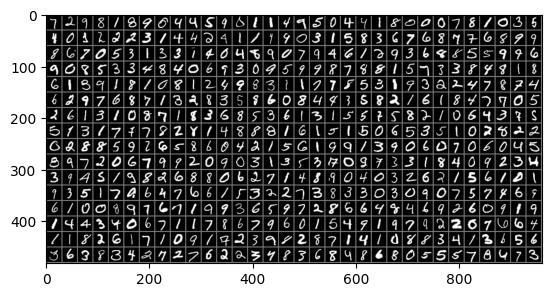

In [3]:
# get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# show images
plottable = tensor_to_plottable(torchvision.utils.make_grid(images, nrow=32))
plt.imshow(plottable)

# Train

In [4]:
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
net.to(device)

Using device: cuda:0


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=3136, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
n_epochs = 15
train_losses, train_accs, val_losses, val_accs = train(net, device, n_epochs, train_loader, val_loader)

torch.save(net.state_dict(), './checkpoint/net_mnist.pt')

Epoch 0/15 | train loss: 0.6179 | train acc: 0.8117: : 119it [00:04, 29.36it/s]                       
Epoch 0/15 | val loss: 0.1797 | val acc: 0.9473: : 11it [00:00, 38.34it/s]                      


Epoch 1/15 | train loss: 0.1492 | train acc: 0.9575: : 119it [00:01, 63.21it/s]                       
Epoch 1/15 | val loss: 0.1030 | val acc: 0.9727: : 11it [00:00, 40.97it/s]                      


Epoch 2/15 | train loss: 0.1085 | train acc: 0.9682: : 119it [00:01, 64.36it/s]                       
Epoch 2/15 | val loss: 0.0750 | val acc: 0.9795: : 11it [00:00, 40.59it/s]                      


Epoch 3/15 | train loss: 0.0898 | train acc: 0.9736: : 119it [00:01, 62.40it/s]                       
Epoch 3/15 | val loss: 0.0754 | val acc: 0.9775: : 11it [00:00, 40.50it/s]                      


Epoch 4/15 | train loss: 0.0748 | train acc: 0.9782: : 119it [00:01, 61.94it/s]                       
Epoch 4/15 | val loss: 0.0646 | val acc: 0.9803: : 11it [00:00, 40.08it/s]                      


Epoch 5/15 | train loss: 0.0668 | train acc: 0.9800: : 119it [00:01, 63.70it/s]                       
Epoch 5/15 | val loss: 0.0617 | val acc: 0.9807: : 11it [00:00, 40.32it/s]                      


Epoch 6/15 | train loss: 0.0598 | train acc: 0.9822: : 119it [00:02, 58.74it/s]                       
Epoch 6/15 | val loss: 0.0608 | val acc: 0.9804: : 11it [00:00, 40.49it/s]                      


Epoch 7/15 | train loss: 0.0547 | train acc: 0.9834: : 119it [00:01, 62.08it/s]                       
Epoch 7/15 | val loss: 0.0583 | val acc: 0.9847: : 11it [00:00, 36.41it/s]                      


Epoch 8/15 | train loss: 0.0511 | train acc: 0.9844: : 119it [00:01, 60.79it/s]                       
Epoch 8/15 | val loss: 0.0545 | val acc: 0.9821: : 11it [00:00, 39.71it/s]                      


Epoch 9/15 | train loss: 0.0443 | train acc: 0.9869: : 119it [00:01, 60.17it/s]                       
Epoch 9/15 | val loss: 0.0501 | val acc: 0.9838: : 11it [00:00, 39.41it/s]                      


Epoch 10/15 | train loss: 0.0414 | train acc: 0.9877: : 119it [00:01, 60.92it/s]                       
Epoch 10/15 | val loss: 0.0563 | val acc: 0.9847: : 11it [00:00, 38.51it/s]                      


Epoch 11/15 | train loss: 0.0394 | train acc: 0.9885: : 119it [00:02, 58.26it/s]                       
Epoch 11/15 | val loss: 0.0458 | val acc: 0.9848: : 11it [00:00, 39.04it/s]                      


Epoch 12/15 | train loss: 0.0376 | train acc: 0.9881: : 119it [00:02, 59.41it/s]                       
Epoch 12/15 | val loss: 0.0530 | val acc: 0.9827: : 11it [00:00, 37.12it/s]                      


Epoch 13/15 | train loss: 0.0336 | train acc: 0.9895: : 119it [00:02, 58.76it/s]                       
Epoch 13/15 | val loss: 0.0417 | val acc: 0.9864: : 11it [00:00, 40.10it/s]                      


Epoch 14/15 | train loss: 0.0317 | train acc: 0.9900: : 119it [00:02, 59.23it/s]                       
Epoch 14/15 | val loss: 0.0401 | val acc: 0.9893: : 11it [00:00, 39.93it/s]                      

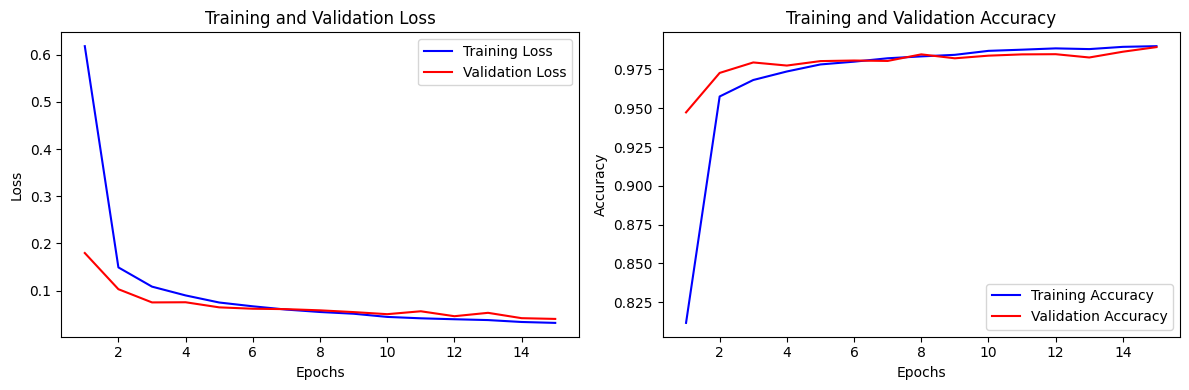

In [6]:
epochs = range(1, n_epochs + 1)

# Plotting losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, 'b', label='Training Accuracy')
plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test

In [7]:
net = Net()
net.load_state_dict(torch.load('./checkpoint/net_mnist.pt'))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Linear(in_features=3136, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
ytrue, ypred = test(net, device, test_loader)

100%|██████████| 10/10 [00:00<00:00, 34.87it/s]


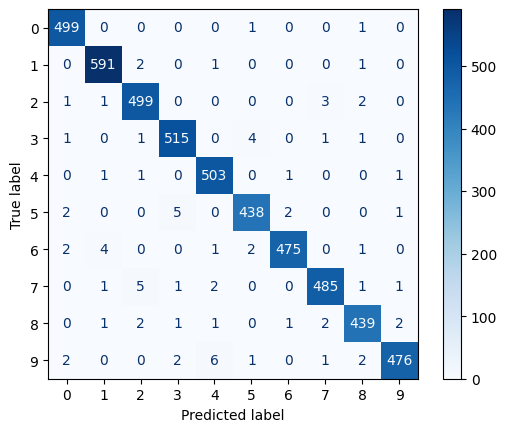

In [9]:
ConfusionMatrixDisplay.from_predictions(ytrue, ypred, cmap=plt.cm.Blues)

In [10]:
print(classification_report(ytrue, ypred, target_names=classes))

              precision    recall  f1-score   support

    0 - zero       0.98      1.00      0.99       501
     1 - one       0.99      0.99      0.99       595
     2 - two       0.98      0.99      0.98       506
   3 - three       0.98      0.98      0.98       523
    4 - four       0.98      0.99      0.99       507
    5 - five       0.98      0.98      0.98       448
     6 - six       0.99      0.98      0.99       485
   7 - seven       0.99      0.98      0.98       496
   8 - eight       0.98      0.98      0.98       449
    9 - nine       0.99      0.97      0.98       490

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

